In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
%matplotlib inline

In [4]:
a= 'C:\\Users\\HP\\Desktop\\My_Data_set_files\\heart_disease.csv'
df= pd.read_csv(a)
df

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [5]:
df.describe()

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


In [6]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting blood pressure',
       'serum cholestoral in mg/dl      ', 'fasting blood sugar > 120 mg/dl ',
       'resting electrocardiographic results', 'maximum heart rate achieved  ',
       'exercise induced angina    ', 'oldpeak ', 'slope of peak',
       'number of major vessels ', 'thal', 'Disease'],
      dtype='object')

In [7]:
df.isnull().sum()

age                                     0
sex                                     0
chest pain type                         0
resting blood pressure                  0
serum cholestoral in mg/dl              0
fasting blood sugar > 120 mg/dl         0
resting electrocardiographic results    0
maximum heart rate achieved             0
exercise induced angina                 0
oldpeak                                 0
slope of peak                           0
number of major vessels                 0
thal                                    0
Disease                                 0
dtype: int64

In [8]:
df['chest pain type']

0      4
1      3
2      2
3      4
4      2
      ..
265    3
266    2
267    2
268    4
269    4
Name: chest pain type, Length: 270, dtype: int64

<AxesSubplot:xlabel='chest pain type', ylabel='count'>

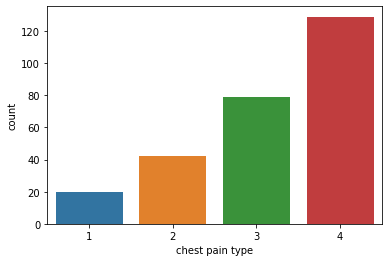

In [9]:
sns.countplot(x = 'chest pain type', data = df)

<AxesSubplot:title={'center':'Age and sex distribution'}, xlabel='sex', ylabel='age'>

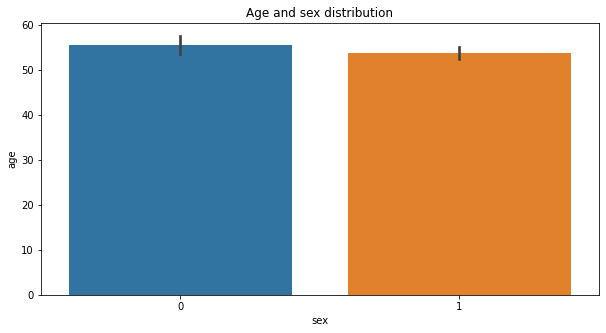

In [10]:
plt.figure(figsize = (10,5))
plt.title('Age and sex distribution')
sns.barplot(x = df['sex'], y =df['age'])

<AxesSubplot:title={'center':'Age and sex distribution'}, xlabel='sex', ylabel='Disease'>

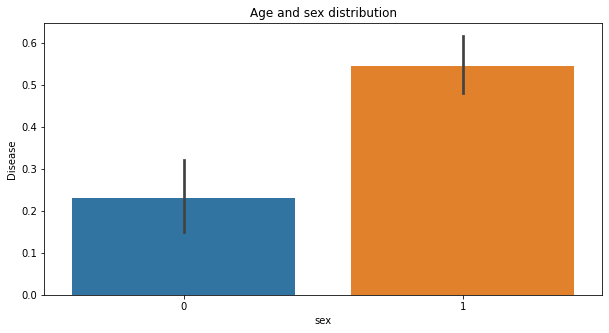

In [11]:
plt.figure(figsize = (10,5))
plt.title('Age and sex distribution')
sns.barplot(x = df['sex'], y =df['Disease'])

<AxesSubplot:>

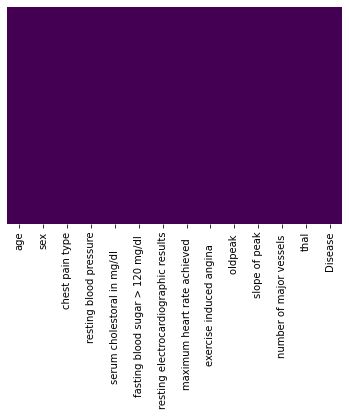

In [12]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

<AxesSubplot:title={'center':'Age and sex distribution'}, xlabel='age', ylabel='chest pain type'>

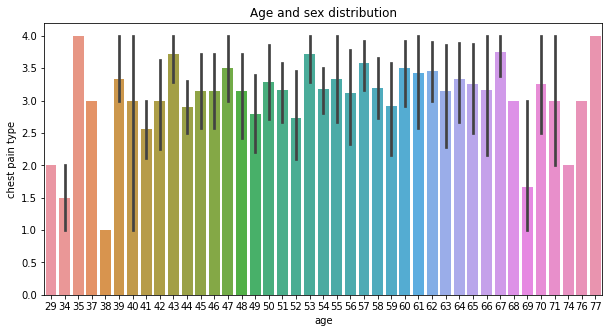

In [13]:
plt.figure(figsize = (10,5))
plt.title('Age and sex distribution')
sns.barplot(x = df['age'], y =df['chest pain type'])

In [14]:
df= df.drop(['oldpeak ', 'slope of peak'], axis= 1)
df

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,number of major vessels,thal,Disease
0,70,1,4,130,322,0,2,109,0,3,3,1
1,67,0,3,115,564,0,2,160,0,0,7,0
2,57,1,2,124,261,0,0,141,0,0,7,1
3,64,1,4,128,263,0,0,105,1,1,7,0
4,74,0,2,120,269,0,2,121,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0,7,0
266,44,1,2,120,263,0,0,173,0,0,7,0
267,56,0,2,140,294,0,2,153,0,0,3,0
268,57,1,4,140,192,0,0,148,0,0,6,0


In [15]:
X= df.drop(['Disease'], axis= 1)
X

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,number of major vessels,thal
0,70,1,4,130,322,0,2,109,0,3,3
1,67,0,3,115,564,0,2,160,0,0,7
2,57,1,2,124,261,0,0,141,0,0,7
3,64,1,4,128,263,0,0,105,1,1,7
4,74,0,2,120,269,0,2,121,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0,7
266,44,1,2,120,263,0,0,173,0,0,7
267,56,0,2,140,294,0,2,153,0,0,3
268,57,1,4,140,192,0,0,148,0,0,6


In [16]:
y= df['Disease']
y

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: Disease, Length: 270, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state= 101, test_size= 0.2)

In [18]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

C:\Users\HP\PycharmProjects\pythonProject1\venv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8333333333333334

In [37]:
pre1= lr.predict(X_test)
pre1

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pre1))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        30
           1       0.86      0.75      0.80        24

    accuracy                           0.83        54
   macro avg       0.84      0.82      0.83        54
weighted avg       0.84      0.83      0.83        54



In [42]:
from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.7777777777777778

In [43]:
pre2= tree.predict(X_test)
pre2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

In [44]:
from sklearn.metrics import classification_report, confusion_matrix
clr= classification_report(pre2, y_test)
print(clr)

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        36
           1       0.62      0.83      0.71        18

    accuracy                           0.78        54
   macro avg       0.76      0.79      0.77        54
weighted avg       0.81      0.78      0.78        54



In [46]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7962962962962963

In [47]:
pre3= rf.predict(X_test)
pre3

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
clr= classification_report(pre3, y_test)
print(clr)

              precision    recall  f1-score   support

           0       0.87      0.79      0.83        33
           1       0.71      0.81      0.76        21

    accuracy                           0.80        54
   macro avg       0.79      0.80      0.79        54
weighted avg       0.81      0.80      0.80        54



In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.6481481481481481

In [50]:
pre4= knn.predict(X_test)
pre4

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
clr= classification_report(pre4, y_test)
print(clr)

              precision    recall  f1-score   support

           0       0.77      0.66      0.71        35
           1       0.50      0.63      0.56        19

    accuracy                           0.65        54
   macro avg       0.63      0.64      0.63        54
weighted avg       0.67      0.65      0.66        54



In [53]:
lgr_acc= accuracy_score(y_test, pre1)
lgr_acc*100

83.33333333333334

In [54]:
dtree_acc= accuracy_score(y_test, pre2)
dtree_acc*100

77.77777777777779

In [55]:
rdm_acc= accuracy_score(y_test, pre3)
rdm_acc*100

79.62962962962963

In [56]:
knn_acc= accuracy_score(y_test, pre4)
knn_acc*100

64.81481481481481

In [57]:
model_accuracy= {'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNneighbours'], 'Accuracy': [lgr_acc, dtree_acc, rdm_acc, knn_acc]}
model_accuracy

{'Model': ['Logistic Regression',
  'Decision Tree',
  'Random Forest',
  'KNneighbours'],
 'Accuracy': [0.8333333333333334,
  0.7777777777777778,
  0.7962962962962963,
  0.6481481481481481]}

In [58]:
df3= pd.DataFrame(model_accuracy)
df3

,Model,Accuracy
0,Logistic Regression,0.833333
1,Decision Tree,0.777778
2,Random Forest,0.796296
3,KNneighbours,0.648148


In [59]:
df.to_csv('heartdisease_data.csv')